# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: Matthew Block
[JSON Sentiment Repository](https://github.com/matthewpblock/json-sentiment)  

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

In [37]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import json and pickle (included in the Python Standard Library).

import json
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load spaCy and add spacytextblob pipeline 
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob", last=True)


print('All prereqs installed.')
# !pip list

All prereqs installed.


1. The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

## Question 1 Code:

In [38]:
import requests
import json

AUTHOR='Edgar Allan Poe'
POEM = 'The Raven'

#only certain poets and titles are available
#to see the available poets, go to (in a web browser)
# https://poetrydb.org/author
#To see which poems that author has available, go to 
# https://poetrydb.org/author/AUTHOR NAME
# e.g.: https://poetrydb.org/author/Edgar Allan Poe
#The spaces will get handled by your web browser

# A cool pythonism (introduced in Python 3): f strings
# https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings
URL = f'https://poetrydb.org/author,title/{AUTHOR};{POEM}'
result = json.loads(requests.get(URL).text)
lyrics = '\n'.join(result[0]['lines']) 


In [39]:
# Outdated API call from assignement
#-----------------------------------#

# result = json.loads(requests.get('https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul').text)

#####
# with open('birdhouse_lyrics.json', 'w', encoding='utf-8') as f:
#     json.dump(result, f, indent=4, ensure_ascii=False)



2. Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

## Question 2 Code:

In [40]:
print(lyrics)

Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore--
While I nodded, nearly napping, suddenly there came a tapping,
As of some one gently rapping--rapping at my chamber door.
"'Tis some visitor," I muttered, "tapping at my chamber door--
        Only this and nothing more."

Ah, distinctly I remember, it was in the bleak December,
And each separate dying ember wrought its ghost upon the floor.
Eagerly I wished the morrow;--vainly I had sought to borrow
From my books surcease of sorrow--sorrow for the lost Lenore--
For the rare and radiant maiden whom the angels name Lenore--
        Nameless here for evermore.

And the silken sad uncertain rustling of each purple curtain
Thrilled me--filled me with fantastic terrors never felt before;
So that now, to still the beating of my heart, I stood repeating
"'Tis some visitor entreating entrance at my chamber door--
Some late visitor entreating entrance at my chamber door;--
  

## Question 2 Code (continued):

In [41]:
# Analyze the poem using spaCy with spacytextblob

# Analyze sentiment
doc = nlp(lyrics)
# use the SpacyTextBlob component to get sentiment
sentiment = doc._.blob.sentiment        # Thanks to Matt Hanson for pointing out the blob.sentiment attribute; this was key to completing the assignment for me.
print(sentiment)


# Comment:
# The polarity score ranges from -1.0 (very negative) to 1.0 (very positive).
# Use this score to assess emotional tone: higher = more positive; lower = more negative.
# A polarity close to zero indicates a neutral or mixed sentiment.


Sentiment(polarity=0.03847439660795825, subjectivity=0.5720917590780605)


3. Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

## Question 3 Code:

In [42]:
def get_and_save_poem(artist: str, poem_title: str, filename: str):
    """
    Fetches a poem from poetrydb.org and saves its text to a file.

    This function constructs the API URL, handles potential network errors,
    checks for API-specific 'not found' errors, and writes the poem's
    content to the specified file.

    Args:
        artist (str): The name of the poet.
        poem_title (str): The title of the poem.
        filename (str): The path to the file where the poem will be saved.
    """
    print(f"Attempting to fetch '{poem_title}' by {artist}...")
    url = f'https://poetrydb.org/author,title/{artist};{poem_title}'
    
    try:
        response = requests.get(url)
        # Raise an HTTPError for bad responses (4xx or 5xx)
        response.raise_for_status()
        
        result = response.json()
        
        # The API can return a 404 status in the JSON body for unfound poems
        if isinstance(result, dict) and result.get('status') == 404:
            print(f"--> FAILURE: Poem '{poem_title}' by {artist} not found on poetrydb.org.")
            return

        # Ensure the response is a list and not empty
        if not isinstance(result, list) or not result:
            print(f"--> FAILURE: Unexpected response format for '{poem_title}'.")
            return

        # Extract the lines and join them into a single string
        poem_text = '\n'.join(result[0]['lines'])
        
        # Write the poem text to the specified file
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(poem_text)
        
        print(f"--> SUCCESS: Saved '{poem_title}' to '{filename}'")

    except requests.exceptions.RequestException as e:
        print(f"--> FAILURE: A network error occurred: {e}")
    except (json.JSONDecodeError, IndexError, KeyError) as e:
        print(f"--> FAILURE: Error processing the API response: {e}")

# --- Testing the function ---
AUTHOR = 'Edgar Allan Poe'
poems_to_fetch = {
    "The Raven": "the_raven.txt",
    "Lenore": "lenore.txt",
    "The Bells": "the_bells.txt",
    "Eldorado": "eldorado.txt"
}

# Loop through the poems and call the function for each one
for title, filename in poems_to_fetch.items():
    get_and_save_poem(AUTHOR, title, filename)


Attempting to fetch 'The Raven' by Edgar Allan Poe...
--> SUCCESS: Saved 'The Raven' to 'the_raven.txt'
Attempting to fetch 'Lenore' by Edgar Allan Poe...
--> SUCCESS: Saved 'Lenore' to 'lenore.txt'
Attempting to fetch 'The Bells' by Edgar Allan Poe...
--> SUCCESS: Saved 'The Bells' to 'the_bells.txt'
Attempting to fetch 'Eldorado' by Edgar Allan Poe...
--> SUCCESS: Saved 'Eldorado' to 'eldorado.txt'


4. Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

## Question 4 Code

In [43]:
def analyze_sentiment_from_file(filename: str) -> float | None:
    """
    Reads text from a file, performs sentiment analysis, and returns the polarity score.

    Args:
        filename (str): The path to the text file.

    Returns:
        float | None: The polarity score (-1.0 to 1.0), or None if the file is not found.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            text_content = f.read()
        
        # Process the text using the global nlp object configured with spacytextblob.
        # This assumes 'nlp' was initialized in a previous cell.
        doc = nlp(text_content)
        
        # Access the sentiment object and return its polarity attribute.
        # This is a robust way to get the score.
        return doc._.blob.sentiment.polarity
        
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
        return None

# --- Testing the function with the files created in Q3 ---
files_to_analyze = {
    "The Raven": "the_raven.txt",
    "Lenore": "lenore.txt",
    "The Bells": "the_bells.txt",
    "Eldorado": "eldorado.txt"
}

print("--- Sentiment Analysis of Poe's Poems ---")
for title, filename in files_to_analyze.items():
    score = analyze_sentiment_from_file(filename)
    if score is not None:
        # Format the score to 4 decimal places for cleaner output
        print(f"Polarity for '{title}': {score:.4f}")



--- Sentiment Analysis of Poe's Poems ---
Polarity for 'The Raven': 0.0385
Polarity for 'Lenore': 0.0234
Polarity for 'The Bells': 0.0813
Polarity for 'Eldorado': 0.0802


## Question 4 Musings:
It's interesting to note that all four of Poe's poems calculate scores between 0 and 0.1, so only slightly positive but quite consistent. I think most people would expect a more negative score.  
My Gemini Code tool suggested using Hugging Face to explore how these programs score differently using context stanza-by-stanza, so some experimention continues below.

## Experimentation Code

In [44]:

from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline from Hugging Face.
# This model is more context-aware than the lexicon-based approach.
sentiment_pipeline = pipeline("sentiment-analysis")

# Read the content of 'The Bells' from the file created earlier
with open('the_bells.txt', 'r', encoding='utf-8') as f:
    bells_text = f.read()

# Split the poem into stanzas. In this file, they are separated by double newlines.
stanzas = bells_text.strip().split('\n\n')

print("--- Context-Aware Sentiment Analysis of 'The Bells' (Stanza by Stanza) ---")
for i, stanza in enumerate(stanzas):
    # The pipeline expects a list of texts, so we wrap the stanza in a list.
    # We also truncate long stanzas to fit the model's max input size.
    result = sentiment_pipeline([stanza[:512]])
    
    # The result is a list containing a dictionary.
    label = result[0]['label']
    score = result[0]['score']
    
    print(f"Stanza {i+1}: Label='{label}', Confidence Score={score:.4f}")

print("\n--- Overall Poem Analysis ---")
# Analyze the entire poem's text (truncated to fit the model)
overall_result = sentiment_pipeline([bells_text[:512]])
overall_label = overall_result[0]['label']
overall_score = overall_result[0]['score']
print(f"Overall Poem: Label='{overall_label}', Confidence Score={overall_score:.4f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


--- Context-Aware Sentiment Analysis of 'The Bells' (Stanza by Stanza) ---
Stanza 1: Label='POSITIVE', Confidence Score=0.9996
Stanza 2: Label='POSITIVE', Confidence Score=0.9996
Stanza 3: Label='NEGATIVE', Confidence Score=0.6310
Stanza 4: Label='NEGATIVE', Confidence Score=0.9703

--- Overall Poem Analysis ---
Overall Poem: Label='POSITIVE', Confidence Score=0.9996


In [45]:

from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline from Hugging Face.
# This model is more context-aware than the lexicon-based approach.
sentiment_pipeline = pipeline("sentiment-analysis")

# Read the content of 'The Bells' from the file created earlier
with open('the_raven.txt', 'r', encoding='utf-8') as f:
    bells_text = f.read()

# Split the poem into stanzas. In this file, they are separated by double newlines.
stanzas = bells_text.strip().split('\n\n')

print("--- Context-Aware Sentiment Analysis of 'The Raven' (Stanza by Stanza) ---")
for i, stanza in enumerate(stanzas):
    # The pipeline expects a list of texts, so we wrap the stanza in a list.
    # We also truncate long stanzas to fit the model's max input size.
    result = sentiment_pipeline([stanza[:512]])
    
    # The result is a list containing a dictionary.
    label = result[0]['label']
    score = result[0]['score']
    
    print(f"Stanza {i+1}: Label='{label}', Confidence Score={score:.4f}")

print("\n--- Overall Poem Analysis ---")
# Analyze the entire poem's text (truncated to fit the model)
overall_result = sentiment_pipeline([bells_text[:512]])
overall_label = overall_result[0]['label']
overall_score = overall_result[0]['score']
print(f"Overall Poem: Label='{overall_label}', Confidence Score={overall_score:.4f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


--- Context-Aware Sentiment Analysis of 'The Raven' (Stanza by Stanza) ---
Stanza 1: Label='NEGATIVE', Confidence Score=0.9362
Stanza 2: Label='NEGATIVE', Confidence Score=0.5073
Stanza 3: Label='POSITIVE', Confidence Score=0.9901
Stanza 4: Label='NEGATIVE', Confidence Score=0.9655
Stanza 5: Label='NEGATIVE', Confidence Score=0.9747
Stanza 6: Label='POSITIVE', Confidence Score=0.9913
Stanza 7: Label='NEGATIVE', Confidence Score=0.9450
Stanza 8: Label='POSITIVE', Confidence Score=0.9543
Stanza 9: Label='POSITIVE', Confidence Score=0.5127
Stanza 10: Label='NEGATIVE', Confidence Score=0.9905
Stanza 11: Label='NEGATIVE', Confidence Score=0.9975
Stanza 12: Label='POSITIVE', Confidence Score=0.7986
Stanza 13: Label='NEGATIVE', Confidence Score=0.9728
Stanza 14: Label='NEGATIVE', Confidence Score=0.9624
Stanza 15: Label='NEGATIVE', Confidence Score=0.9481
Stanza 16: Label='POSITIVE', Confidence Score=0.9591
Stanza 17: Label='NEGATIVE', Confidence Score=0.9906
Stanza 18: Label='NEGATIVE', Conf

## Final Analysis:
I'm still intrigued by the consistency of the polarity scores for the four poems I chose and am curious if that's representative of the rest of the work, so I generated a script to pull all the available poems and chart their polarity scores:

Fetching all titles for Edgar Allan Poe...
Found 50 poems.

--- Polarity Scores for Edgar Allan Poe's Poems ---
                                 title  polarity
0   Hymn To Aristogeiton And Harmodius  0.514844
1                               To----  0.425000
2                               To----  0.425000
3                          Annabel Lee  0.360393
4                         To The River  0.355000
5                         To My Mother  0.343750
6                          A Valentine  0.294643
7                                 Song  0.287500
8                              Eulalie  0.266026
9                   Sonnet--To Science  0.226389
10                       Bridal Ballad  0.226296
11                              Dreams  0.225000
12                            To Zante  0.213393
13                           Al Aaraaf  0.213374
14                                Hymn  0.213194
15                              To F--  0.190833
16                  The Haunted Palace  0.184444
17    

C:\Users\matth\AppData\Local\Temp\ipykernel_13096\1643700993.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='polarity', y='title', data=df_sorted, palette='viridis_r')


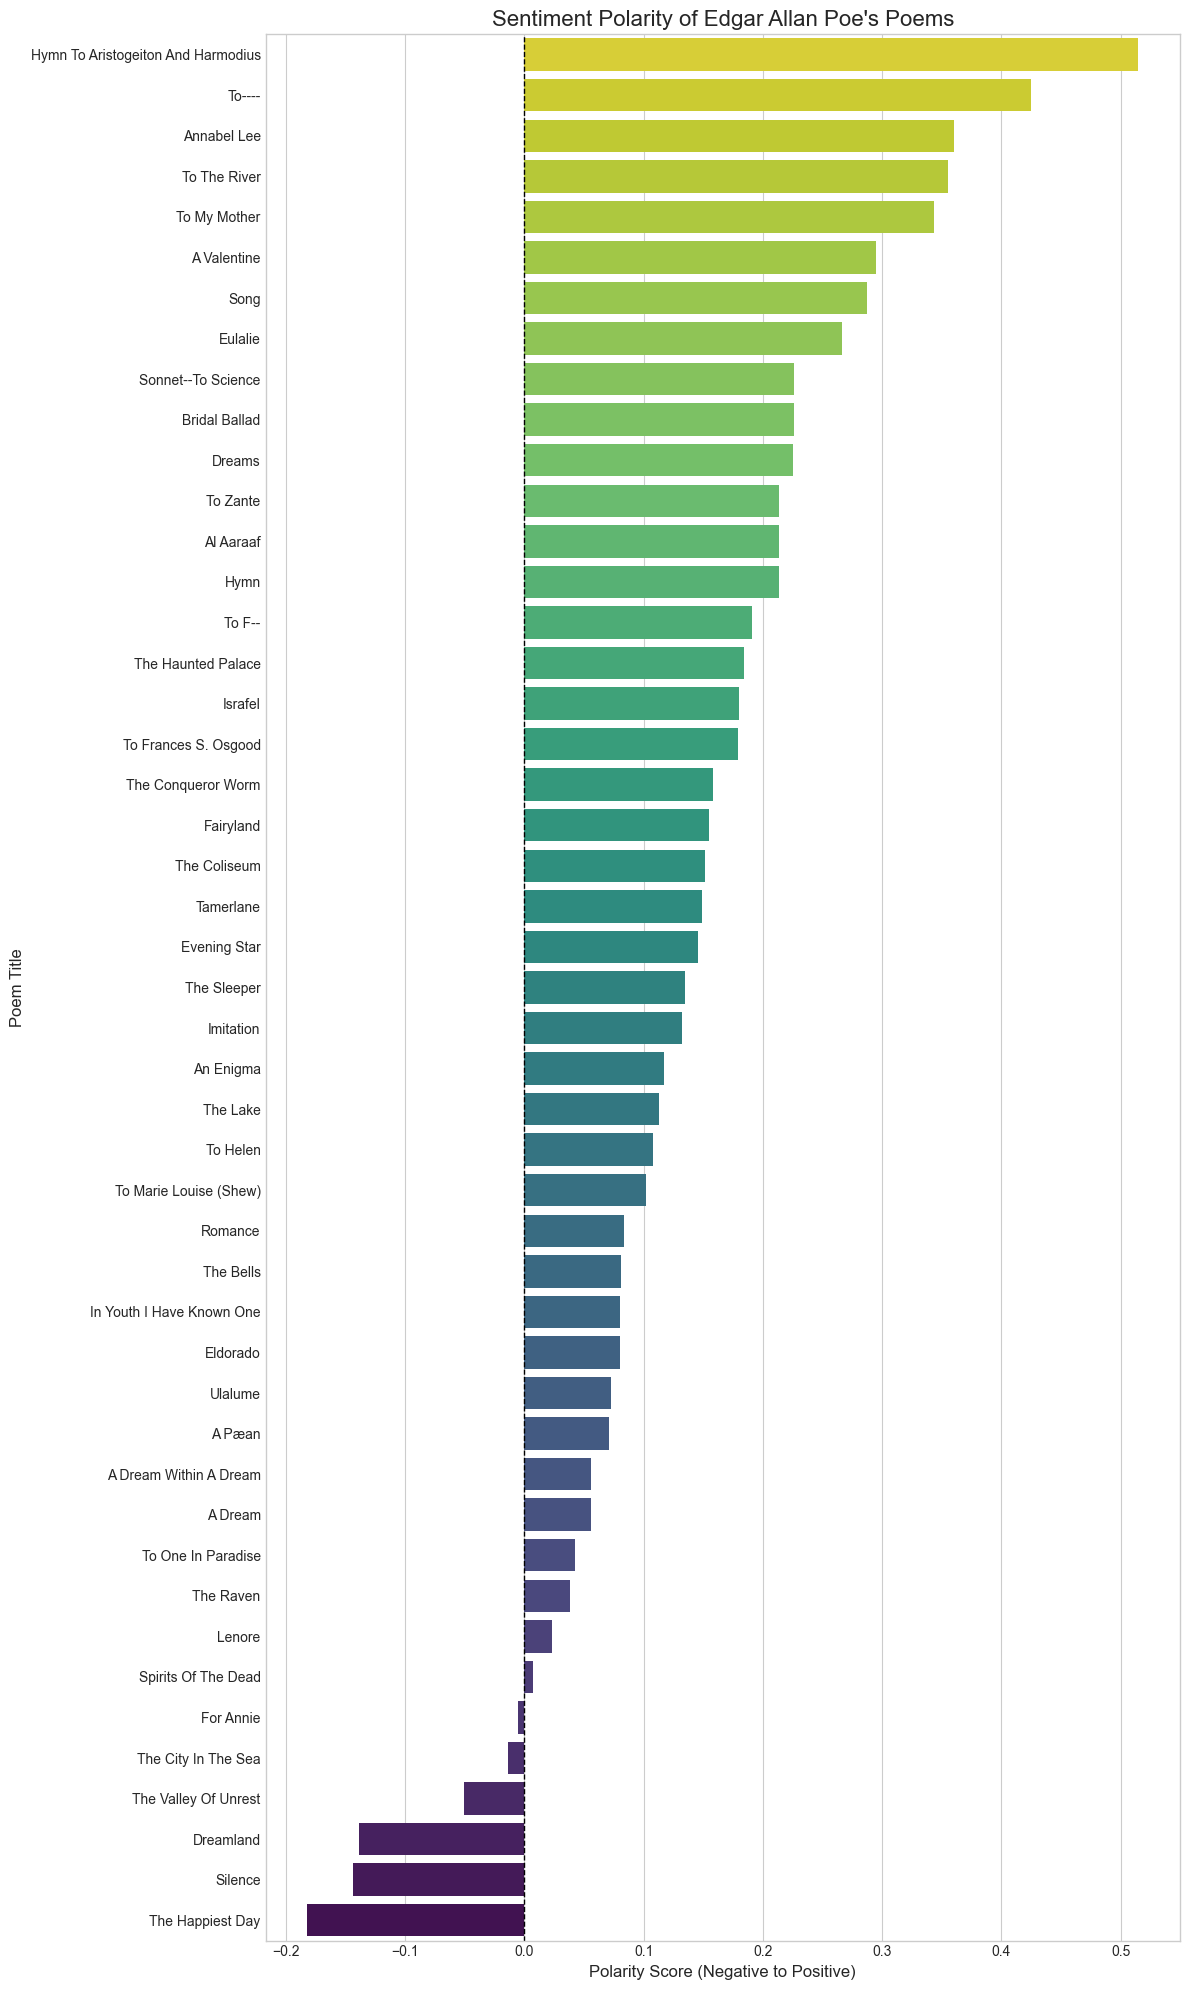

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import os

AUTHOR = 'Edgar Allan Poe'
POEM_DIR = 'poe_poems'

# Create a directory to store the poem files if it doesn't exist
if not os.path.exists(POEM_DIR):
    os.makedirs(POEM_DIR)

def get_all_poem_titles(artist: str) -> list:
    """Fetches a list of all poem titles for a given artist."""
    print(f"Fetching all titles for {artist}...")
    url = f'https://poetrydb.org/author/{artist}/title'
    try:
        response = requests.get(url)
        response.raise_for_status()
        titles = [item['title'] for item in response.json()]
        print(f"Found {len(titles)} poems.")
        return titles
    except requests.exceptions.RequestException as e:
        print(f"Error fetching titles: {e}")
        return []

def sanitize_filename(title: str) -> str:
    """Creates a safe filename from a poem title."""
    # Lowercase, replace spaces with underscores
    s = title.lower().replace(' ', '_')
    # Remove any character that is not a letter, number, or underscore
    s = re.sub(r'[^a-z0-9_]', '', s)
    return f"{s}.txt"

# --- Main Execution ---
# Assumes get_and_save_poem() and analyze_sentiment_from_file() are defined in previous cells.
all_titles = get_all_poem_titles(AUTHOR)
sentiment_data = []

for title in all_titles:
    # Use a subdirectory to keep the main project folder clean
    filename = os.path.join(POEM_DIR, sanitize_filename(title))
    
    # We can skip downloading if the file already exists to save time
    if not os.path.exists(filename):
        # This function is defined in a previous cell
        get_and_save_poem(AUTHOR, title, filename)
    
    # This function is also defined in a previous cell
    score = analyze_sentiment_from_file(filename)
    if score is not None:
        sentiment_data.append({'title': title, 'polarity': score})

# --- Create DataFrame and Plot ---
if sentiment_data:
    df = pd.DataFrame(sentiment_data)
    df_sorted = df.sort_values('polarity', ascending=False).reset_index(drop=True)
    
    print("\n--- Polarity Scores for Edgar Allan Poe's Poems ---")
    print(df_sorted)
    
    # Create the plot
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 20)) # Figure size might need adjustment based on number of poems
    
    # Create a horizontal bar plot for easy reading of titles
    sns.barplot(x='polarity', y='title', data=df_sorted, palette='viridis_r')
    
    plt.title(f"Sentiment Polarity of Edgar Allan Poe's Poems", fontsize=16)
    plt.xlabel('Polarity Score (Negative to Positive)', fontsize=12)
    plt.ylabel('Poem Title', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Add a line at zero for reference
    plt.tight_layout()
    plt.show()
else:
    print("\nNo sentiment data was collected. Cannot generate plot.")


I got a special chuckle out of the most negative score being "The Happiest Day"!